In [2]:
import os
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colormaps
from shapely.geometry import Polygon, MultiPolygon
from shapely import wkt
from matplotlib.patches import Patch

# Soil Regions

### Type of the soil dataset

This dataset represents different land areas in the Netherlands, categorized by soil types and land use. Each row describes a specific region with attributes such as the name (LMM14naam), soil type (HGRnaam), surface area (Oppkm2 in square kilometers and OppHa in hectares), and geometry (MULTIPOLYGON) used for spatial mapping.

In [3]:
type_of_data = "type_of_soil"

current_dir = os.getcwd()
datasetdir = os.path.join(current_dir, '../../data/raw', type_of_data)
soil_type_path = os.path.join(datasetdir, "LMM14_HGR.shp")

In [4]:
lmm = gpd.read_file(soil_type_path)
print(lmm.columns)
lmm.head()

Index(['LMM14nr', 'LMM14naam', 'HGRnr', 'HGRnaam', 'Oppkm2', 'OppHa', 'groep',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


,LMM14nr,LMM14naam,HGRnr,HGRnaam,Oppkm2,OppHa,groep,Shape_Leng,Shape_Area,geometry
0,1,Noordelijk Zeekleigebied,2,klei,2782,278155.0,Klei,6.914546e+05,2.781548e+09,"MULTIPOLYGON (((153749 565427, 153793 565364, ..."
1,2,Noordelijk Veenweidegeb.,3,veen,1657,165741.0,Veen,4.736756e+05,1.657414e+09,"MULTIPOLYGON (((184855 511154, 184892 511129, ..."
2,3,Polders en Droogmakerijen,2,klei,3422,342242.0,Klei,1.003352e+06,3.422415e+09,"MULTIPOLYGON (((92170.4 460493.696, 92437.4 46..."
3,4,Westelijk Veenweidegeb.,3,veen,1929,192919.0,Veen,7.014368e+05,1.929187e+09,"MULTIPOLYGON (((147852.2 476898.22, 147938.05 ..."
4,5,Zuidwestelijk Kleigebied,2,klei,3630,363042.0,Klei,1.638755e+06,3.630416e+09,"MULTIPOLYGON (((25134.069 381458.669, 25226.24..."


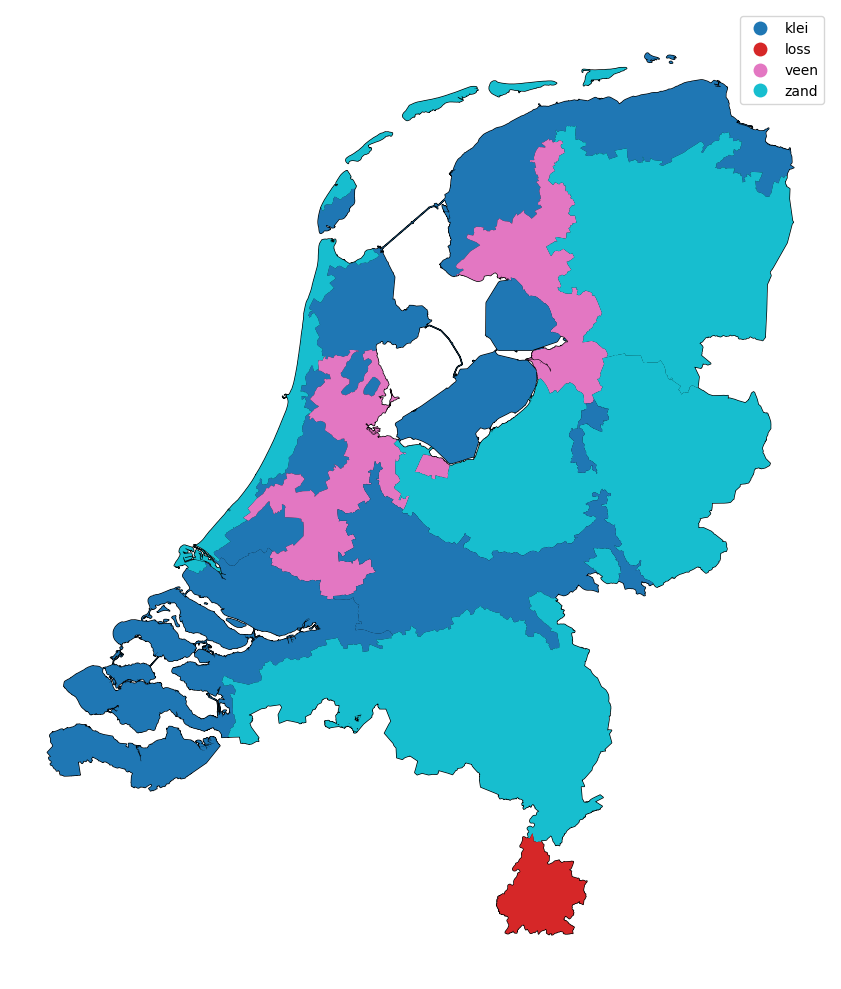

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
lmm.plot(ax=ax, edgecolor='black', facecolor='lightgrey')

lmm.plot(column='HGRnaam', ax=ax, legend=True)
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [6]:
translation_dict = {
    'zand': 'Sand',
    'loss': 'Loess',
    'klei': 'Clay',
    'veen': 'Peat'
}

region_colors = {
    'Sand': '#e9c46a',
    'Loess': 'slategrey',
    'Clay': 'sienna',
    'Peat': '#264653'
}

lmm['HGRnaam_english'] = lmm['HGRnaam'].map(translation_dict)
lmm['color'] = lmm['HGRnaam_english'].map(region_colors)

In [7]:
lmm

,LMM14nr,LMM14naam,HGRnr,HGRnaam,Oppkm2,OppHa,groep,Shape_Leng,Shape_Area,geometry,HGRnaam_english,color
0,1,Noordelijk Zeekleigebied,2,klei,2782,278155.0,Klei,6.914546e+05,2.781548e+09,"MULTIPOLYGON (((153749 565427, 153793 565364, ...",Clay,sienna
1,2,Noordelijk Veenweidegeb.,3,veen,1657,165741.0,Veen,4.736756e+05,1.657414e+09,"MULTIPOLYGON (((184855 511154, 184892 511129, ...",Peat,#264653
2,3,Polders en Droogmakerijen,2,klei,3422,342242.0,Klei,1.003352e+06,3.422415e+09,"MULTIPOLYGON (((92170.4 460493.696, 92437.4 46...",Clay,sienna
3,4,Westelijk Veenweidegeb.,3,veen,1929,192919.0,Veen,7.014368e+05,1.929187e+09,"MULTIPOLYGON (((147852.2 476898.22, 147938.05 ...",Peat,#264653
4,5,Zuidwestelijk Kleigebied,2,klei,3630,363042.0,Klei,1.638755e+06,3.630416e+09,"MULTIPOLYGON (((25134.069 381458.669, 25226.24...",Clay,sienna
5,6,Noordelijk Zand I,1,zand,841,84149.9,Zand Noord,2.156564e+05,8.414986e+08,"POLYGON ((198111.17 593388.35, 198157.43 59332...",Sand,#e9c46a
6,10,Centraal Zandgebied,1,zand,2614,261377.0,Zand Midden,3.928638e+05,2.613765e+09,"MULTIPOLYGON (((65067.001 439810, 65087.001 43...",Sand,#e9c46a
7,11,Rivierkleigebied,2,klei,2961,296132.0,Klei,7.402174e+05,2.961319e+09,"MULTIPOLYGON (((204304.02 434015.34, 204292.54...",Clay,sienna
8,12,Zuidelijk Zandgebied,1,zand,5650,565046.0,Zand Zuid,7.224393e+05,5.650463e+09,"MULTIPOLYGON (((119237.82 380491.67, 119153.68...",Sand,#e9c46a
9,13,Lössgebied,4,loss,664,66377.1,Loss,1.674273e+05,6.637706e+08,"POLYGON ((185612.029 341904.598, 185629.176 34...",Loess,slategrey


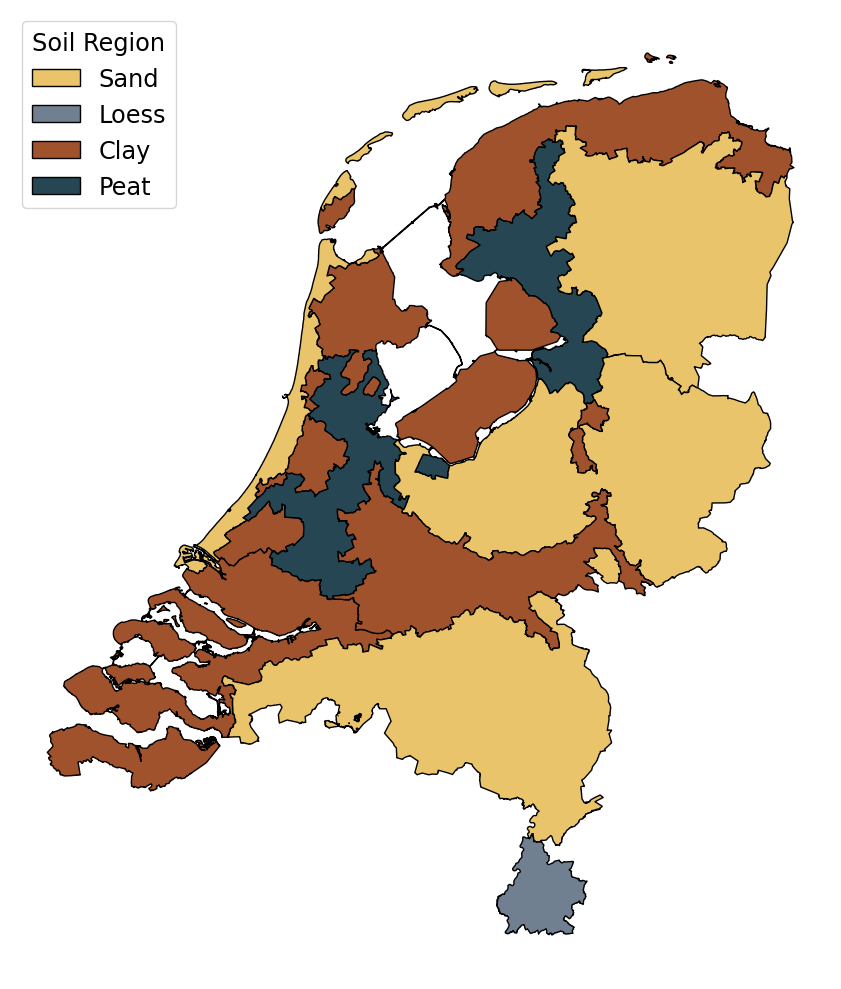

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
lmm.plot(ax=ax, edgecolor='black', color=lmm['color'])

# Create a manual legend
legend_elements = [Patch(facecolor=color, edgecolor='black', label=label)
                   for label, color in region_colors.items()]
# ax.legend(handles=legend_elements, title="Soil Region", loc='lower left')

ax.legend(
    handles=legend_elements,
    title="Soil Region",
    loc='upper left',
    fontsize='xx-large',         # <- make text bigger
    title_fontsize='xx-large'  # <- make title bigger
)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [494]:
def crop_utrecht_east(polygon):
    """Crop Utrecht polygon using a diagonal boundary to return eastern half."""
    x1, y1 = 5.066884, 52.170366  # upper-left
    x2, y2 = 5.237030, 51.978896  # lower-right

    def is_above_line(x, y):
        if x1 == x2:
            return y > y1
        slope = (y2 - y1) / (x2 - x1)
        y_on_line = slope * (x - x1) + y1
        return (y > y_on_line) and (x > x1)

    filtered_coords = [
        (x, y) for x, y in polygon.exterior.coords
        if is_above_line(x, y)
    ]

    if len(filtered_coords) < 3:
        raise ValueError("Not enough points to form a polygon after cropping.")

    if filtered_coords[0] != filtered_coords[-1]:
        filtered_coords.append(filtered_coords[0])

    return Polygon(filtered_coords)

def aoi_finder(provinces):
    """
    Returns a GeoDataFrame containing the AOI geometry based on selected provinces.
    Special handling is done if 'utrecht_east' is in the list.
    """
    # Load province boundaries from GPKG
    provinces_path = os.path.join(datasetdir, "..", "provinces_nl/BestuurlijkeGebieden_2025.gpkg")
    gdf = gpd.read_file(provinces_path, layer="provinciegebied")
    gdf = gdf.to_crs("EPSG:4326")
    gdf["naam"] = gdf["naam"].str.lower()

    provinces = [p.lower() for p in provinces]
    geometries = []

    for province in provinces:
        if province == "utrecht_east":
            utrecht_geom = gdf[gdf["naam"] == "utrecht"].geometry.values[0]
            if isinstance(utrecht_geom, MultiPolygon) and len(utrecht_geom.geoms) == 1:
                utrecht_geom = utrecht_geom.geoms[0]
            cropped = crop_utrecht_east(utrecht_geom)
            geometries.append(cropped)
        else:
            matched = gdf[gdf["naam"] == province]
            if not matched.empty:
                geometries.append(matched.union_all())

    aoi_union = gpd.GeoSeries(geometries).union_all()
    return gpd.GeoDataFrame(geometry=[aoi_union], crs=gdf.crs)

In [495]:
utrecht_mask = aoi_finder(["utrecht_east"])
utrecht_mask_rd = utrecht_mask.to_crs(lmm.crs)
cropped_gdf = gpd.overlay(lmm, utrecht_mask_rd, how='intersection')

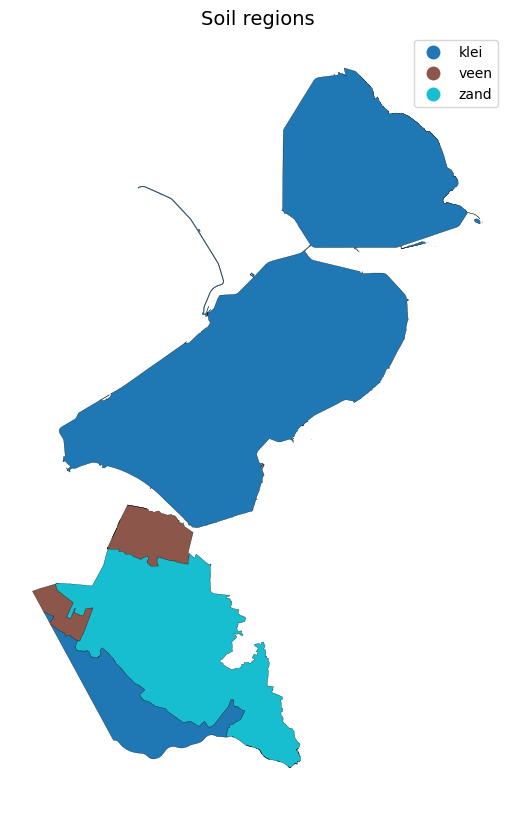

In [496]:
fig, ax = plt.subplots(figsize=(10, 10))
cropped_gdf.plot(column="HGRnaam", ax=ax, legend=True, cmap="tab10", edgecolor="black", linewidth=0.2)

ax.set_title("Soil regions", fontsize=14)
ax.set_axis_off()
plt.show()

## Nitrate data

In [497]:
# well_filter = 1

# current_dir = os.getcwd()
# path = os.path.join(current_dir, '../../data/aligned', f"merged_dataset_{well_filter}.csv")
# df = pd.read_csv(path)
# len(df)

In [498]:
# df["geometry"] = df["geometry"].apply(wkt.loads)

In [499]:
# points_gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

In [500]:
# points_gdf = points_gdf.to_crs(cropped_gdf.crs)

## Groundwater table data

In [501]:
# well_filter = 1

# current_dir = os.getcwd()
# path = os.path.join(current_dir, '../../data/clean/well_depth_data/for_Alignment', f"utrecht_well_depth_combined_{well_filter}.csv")
# depth_df = pd.read_csv(path)
# len(depth_df)

In [502]:
# depth_df["geometry"] = depth_df["geometry"].apply(wkt.loads)

In [503]:
# depth_gdf = gpd.GeoDataFrame(depth_df, geometry="geometry", crs="EPSG:4326")

In [504]:
# depth_gdf = depth_gdf.to_crs(cropped_gdf.crs)

In [505]:
# fig, ax = plt.subplots(figsize=(10, 10))

# # Background: soil regions
# cropped_gdf.plot(column="HGRnaam", ax=ax, legend=True, cmap="tab10", edgecolor="black", linewidth=0.2)

# # Overlay: nitrate points
# points_gdf.plot(ax=ax, color='black', markersize=20, alpha=0.7)

# # Overlay: depth points
# depth_gdf.plot(ax=ax, color='white', markersize=20, alpha=0.7)

# ax.set_title("Soil regions with nitrate points", fontsize=14)
# ax.set_axis_off()
# plt.tight_layout()
# plt.show()

In [506]:
from shapely.geometry import Polygon, MultiPolygon

def diagonal_filter_crop(polygon, x1, y1, x2, y2):
    """Crop a polygon by keeping only points above a diagonal line."""
    if isinstance(polygon, MultiPolygon):
        if len(polygon.geoms) == 1:
            polygon = polygon.geoms[0]
        else:
            raise ValueError("MultiPolygon has multiple parts, cannot apply filter cleanly.")

    def is_above_line(x, y):
        if x1 == x2:
            return y > y1
        slope = (y2 - y1) / (x2 - x1)
        y_on_line = slope * (x - x1) + y1
        return (y > y_on_line) and (x > x1)

    filtered_coords = [(x, y) for x, y in polygon.exterior.coords if is_above_line(x, y)]

    if len(filtered_coords) < 3:
        raise ValueError("Not enough points to create a polygon after filtering.")

    if filtered_coords[0] != filtered_coords[-1]:
        filtered_coords.append(filtered_coords[0])

    return Polygon(filtered_coords)


In [507]:
provinces_path = os.path.join(datasetdir, "../provinces_nl/BestuurlijkeGebieden_2025.gpkg")
gdf = gpd.read_file(provinces_path, layer="provinciegebied")
gdf["naam"] = gdf["naam"].str.lower()

utrecht_geom = gdf[gdf["naam"] == "utrecht"].geometry.values[0]
if isinstance(utrecht_geom, MultiPolygon) and len(utrecht_geom.geoms) == 1:
    utrecht_geom = utrecht_geom.geoms[0]


# cropped = diagonal_filter_crop(utrecht_geom, 5.066884, 52.170366, 5.237030, 51.978896)


In [508]:
print(utrecht_geom)

POLYGON ((131894.47 429932.357, 131917.54 429933.931, 131953.797 429927.513, 131976.68 429919.006, 132000 429919.083, 132011.755 429919.122, 132032.409 429921.619, 132066.158 429928.531, 132104.786 429939.103, 132156.425 429950.488, 132208.064 429957.807, 132237.746 429963.499, 132275.561 429971.225, 132338.585 429984.236, 132375.587 429995.215, 132403.236 430005.38, 132416.654 430012.699, 132444.71 430027.337, 132474.799 430041.975, 132503.668 430057.019, 132535.383 430078.163, 132564.252 430101.746, 132590.275 430115.571, 132622.397 430138.747, 132656.145 430172.089, 132671.596 430193.233, 132675.132 430200.066, 132695.587 430239.586, 132710.631 430276.994, 132714.29 430300.984, 132711.85 430327.006, 132707.378 430352.216, 132700.059 430367.667, 132687.861 430396.13, 132672.003 430416.46, 132652.893 430435.164, 132630.529 430453.868, 132602.473 430475.418, 132558.153 430505.1, 132539.858 430516.534, 132522.371 430527.464, 132476.831 430551.86, 132425.193 430577.07, 132371.52 430601.8